In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

The sorted higher education totals have been saved to: sorted_higher_education_totals.xlsx


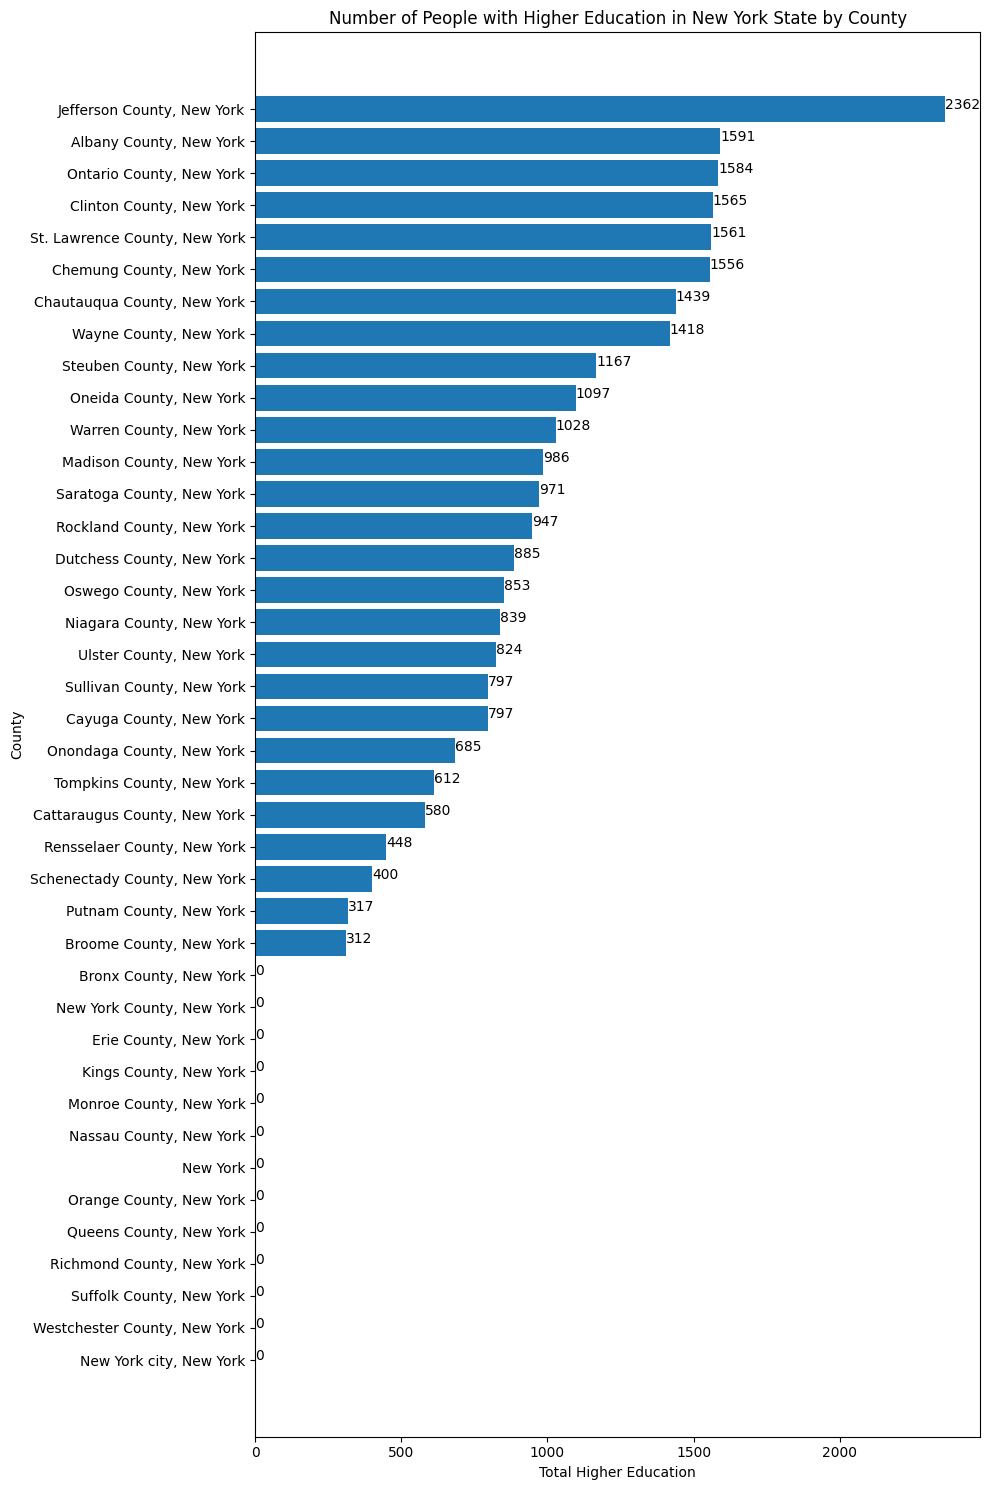

In [ ]:
# Assuming 'data' is your DataFrame containing the education data
# Load the data - replace 'your_file_path.xlsx' with the path to your dataset
file_path = '/content/drive/MyDrive/Data Science Datasets/NYCEducationalAttainment.xlsx'
data = pd.read_excel(file_path, sheet_name='Data')

# Extract county names and education levels of interest
county_names = data.columns[1::2]  # Adjust based on your dataset's structure
education_levels = ['Some college or associate\'s degree', 'Bachelor\'s degree', 'Graduate and professional degree']

# Filter the dataset for the rows corresponding to the education levels of interest
filtered_data = data[data['Unnamed: 0'].isin(education_levels)]

# Initialize a dictionary to hold the total higher education counts for each county
higher_education_totals = {}

# Iterate over each county column to sum up the higher education counts
for county in county_names:
    # Sum the counts for the filtered education levels
    total = filtered_data[county].apply(pd.to_numeric, errors='coerce').sum()
    higher_education_totals[county] = total

# Convert the dictionary to a DataFrame for easier handling and visualization
totals_df = pd.DataFrame(list(higher_education_totals.items()), columns=['County', 'Total Higher Education'])

# Sort the DataFrame by 'Total Higher Education' to see the counties with the highest counts
sorted_totals_df = totals_df.sort_values(by='Total Higher Education', ascending=False)

# Save the sorted DataFrame to a new Excel file
output_file_path = 'sorted_higher_education_totals.xlsx'
sorted_totals_df.to_excel(output_file_path, index=False)

print("The sorted higher education totals have been saved to:", output_file_path)



# Load the higher education data from the spreadsheet
education_data_path = 'sorted_higher_education_totals.xlsx'  # Adjust the path as necessary
education_df = pd.read_excel(education_data_path)

# Sort the DataFrame for better visualization, if not already sorted
education_df.sort_values(by='Total Higher Education', ascending=True, inplace=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 15))
plt.barh(education_df['County'], education_df['Total Higher Education'])

plt.xlabel('Total Higher Education')
plt.ylabel('County')
plt.title('Number of People with Higher Education in New York State by County')
plt.tight_layout()  # Adjust subplot parameters to fit into the figure area

# Optionally, you can add the exact numbers on the bars for clarity
for index, value in enumerate(education_df['Total Higher Education']):
    plt.text(value, index, str(value))

plt.show()

In [ ]:
# of foreign born with higher education / # of foreign born

# Define the file path to the latest uploaded Excel file
latest_file_path = '/content/drive/MyDrive/Data Science Datasets/NYCEducationalAttainment.xlsx'

# Load the data, adjusting for zero-based indexing by pandas (subtracting 1 from provided row indices)
# Skipping rows to directly start from relevant data as indicated in previous attempts
data_latest = pd.read_excel(latest_file_path, sheet_name='Data', header=None)

# Extract county names from row 1 (adjusting for zero-based indexing)
county_names = data_latest.iloc[0, 1:]  # Skipping the first cell assuming it's not a county name

# Adjust indices to 0-based: rows 28-32 in Excel are 27-31 in pandas, and row 27 is 26
divisor_index = 26  # The row to divide by (total foreign born)
dividend_indices = list(range(27, 31))  # Rows for specific educational levels

# Extracting the divisor and dividend rows, converting to numeric and ignoring non-numeric values
divisor = pd.to_numeric(data_latest.iloc[divisor_index, 1:].replace(',', '', regex=True), errors='coerce')
dividends = data_latest.iloc[dividend_indices, 1:].apply(lambda x: pd.to_numeric(x.replace(',', '', regex=True), errors='coerce'))

# Perform the division
division_results = dividends.div(divisor.values, axis=1)

# Assign county names as column headers to the result
division_results.columns = county_names

# Extract and assign row names for the division results
row_names = data_latest.iloc[dividend_indices, 0]  # Extracting row names from the first column
division_results.index = row_names  # Assigning row names to the index of division results

# Drop NaN columns from the division results
division_results_cleaned = division_results.dropna(axis=1, how='all')

division_results_cleaned



# New code to save division_results_cleaned to a CSV file
output_file_path = '/content/drive/MyDrive/Data Science Datasets/DivisionResultsCleaned.csv'
division_results_cleaned.to_csv(output_file_path, index=True)  # Save DataFrame to CSV, retaining index

print(f'Division results saved to {output_file_path}')  # Confirmation message


Division results saved to /content/drive/MyDrive/Data Science Datasets/DivisionResultsCleaned.csv


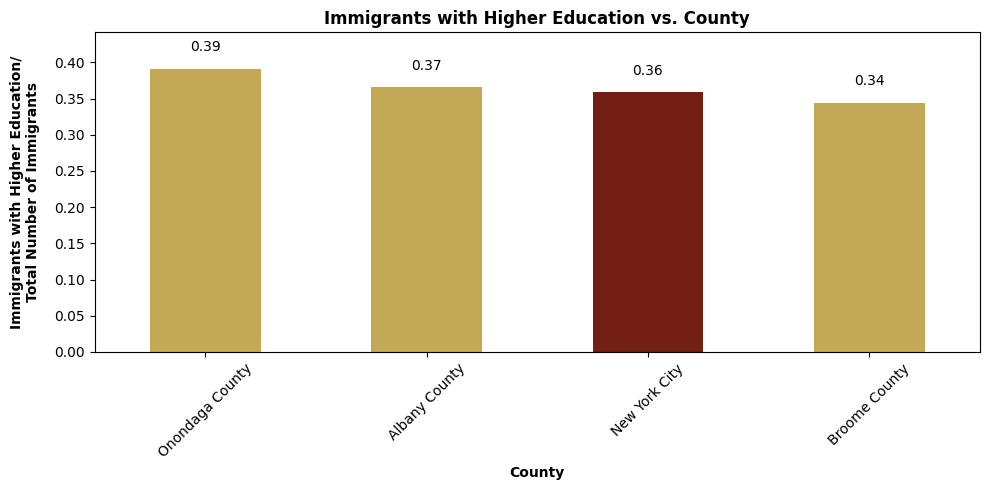

<Figure size 640x480 with 0 Axes>

In [ ]:
# # of foreign born with higher education / # of foreign born

# file_path = '/content/drive/MyDrive/Data Science Datasets/DivisionResultsCleaned.csv'

# # Adjust the indices for zero-based indexing and the specific request
# divisor_index = 26  # Adjusted index for the total number of foreign born (row 27 in Excel, row 26 in pandas)
# dividend_indices = [29, 31]

# # Re-load the data from the last uploaded file path
# data = pd.read_csv(file_path, header=None)

# # Extract county names from the first row, skipping the first cell which is assumed not to be a county name
# county_names = data.iloc[0, 1:]

# # Convert the divisor and dividend rows to numeric, ignoring non-numeric values
# divisor = pd.to_numeric(data.iloc[divisor_index, 1:].replace(',', '', regex=True), errors='coerce')
# dividends = data.iloc[dividend_indices, 1:].apply(lambda x: pd.to_numeric(x.replace(',', '', regex=True), errors='coerce'))

# # Sum the values in dividend rows to get the total number of foreign-born individuals with higher education
# total_higher_education = dividends.sum()

# # Calculate the ratio of foreign-born individuals with higher education to the total number of foreign-born individuals
# ratio_higher_education = total_higher_education / divisor

# # Assign county names as column headers to the ratio series
# ratio_higher_education.index = county_names

# # Convert the ratio series to a DataFrame for easier visualization
# df_ratio_higher_education = pd.DataFrame(ratio_higher_education, columns=['Higher Education Ratio'])

# # Clean the DataFrame by dropping NaN values for visualization
# df_ratio_higher_education_clean = df_ratio_higher_education.dropna()

# # Sort the DataFrame by the 'Higher Education Ratio' column in descending order
# df_ratio_higher_education_sorted = df_ratio_higher_education_clean.sort_values(by='Higher Education Ratio', ascending=False)

# # New code to save division_results_cleaned to a CSV file
# output_file_path = '/content/drive/MyDrive/Data Science Datasets/higher_ed_ratio.csv'
# df_ratio_higher_education_sorted.to_csv(output_file_path, index=True)  # Save DataFrame to CSV, retaining index

# print(f'Division results saved to {output_file_path}')  # Confirmation message

# # Visualizing the calculated ratios in a bar graph
# ax = df_ratio_higher_education_sorted.plot(kind='bar', figsize=(14, 8), legend=True, color='skyblue')
# plt.title('Foreign Born with Higher Education vs. Foreign Born per County')
# plt.ylabel('Ratio')
# plt.xlabel('County')
# plt.xticks(rotation=90)

# # Get the fourth bar object
# fourth_bar = ax.patches[31]

# # Calculate the center x position of the fourth bar
# x_center = fourth_bar.get_x() + fourth_bar.get_width() / 2

# # Calculate the height of the fourth bar
# bar_height = fourth_bar.get_height()

# # Draw a vertical line through the center of the fourth bar, matching the bar's height
# # The y values start at 0 (bottom of the bar) and end at bar_height (top of the bar)
# plt.plot([x_center, x_center], [0, bar_height], color='black', linewidth=2)


# plt.show()

# # Reload the dataset from the new upload
# file_path_updated = '/content/drive/MyDrive/Data Science Datasets/DivisionResultsCleaned.csv'
# division_data_updated = pd.read_csv(file_path_updated)

# # Select only the columns for "New York County", "Albany County", and "Onondaga County"
# # Note: Ensure the county names exactly match the dataset headers
# selected_columns = ["New York County, New York", "Albany County, New York", "Onondaga County, New York", "Broome County, New York"]

# # Sum the values for "Some college or associate's degree" and "Bachelor's degree" for the selected counties
# selected_data = division_data_updated.loc[2:3, selected_columns].sum()

# # Sort these values in descending order
# sorted_selected_data = selected_data.sort_values(ascending=False)

# colors = ['red' if 'New York County' in label else 'yellow' for label in sorted_selected_data.index]

# # Plotting the results
# # Adjust the y-axis label to span two lines for better fit within the plot's height
# plt.figure(figsize=(10, 5))
# ax = sorted_selected_data.plot(kind='bar', color=colors)
# plt.title('Immigrants with Higher Education vs. County', fontweight='bold')
# ax.set_ylabel('Immigrants with Higher Education/\nTotal Number of Immigrants', fontweight='bold', labelpad=10)
# ax.set_xlabel('County', fontweight='bold')
# plt.xticks(rotation=0)  # Keep the county names horizontal for better readability
# plt.ylim(0, sorted_selected_data.max() + 0.05)  # Extend y-axis slightly above the max value for visual clarity
# plt.tight_layout()  # Adjust layout to make sure all labels fit
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Reload the dataset from the new upload
file_path_updated = '/content/drive/MyDrive/Data Science Datasets/DivisionResultsCleaned.csv'
division_data_updated = pd.read_csv(file_path_updated)

# Select only the columns for "New York County", "Albany County", "Onondaga County", and "Broome County, New York"
# Note: Ensure the county names exactly match the dataset headers
selected_columns = ["New York County, New York", "Albany County, New York", "Onondaga County, New York", "Broome County, New York"]

# Sum the values for "Some college or associate's degree" and "Bachelor's degree" for the selected counties
selected_data = division_data_updated.loc[2:3, selected_columns].sum()

# Sort these values in descending order
sorted_selected_data = selected_data.sort_values(ascending=False)
# Rename the columns for display on the graph
rename_columns = {
    "New York County, New York": "New York City",
    "Albany County, New York": "Albany County",
    "Onondaga County, New York": "Onondaga County",
    "Broome County, New York": "Broome County"
}
sorted_selected_data.rename(index=rename_columns, inplace=True)

colors = ['#721F14' if 'New York City' in label else '#C3A956' for label in sorted_selected_data.index]

# Plotting the results
plt.figure(figsize=(10, 5))
ax = sorted_selected_data.plot(kind='bar', color=colors)
plt.title('Immigrants with Higher Education vs. County', fontweight='bold')
ax.set_ylabel('Immigrants with Higher Education/\nTotal Number of Immigrants', fontweight='bold', labelpad=10)
ax.set_xlabel('County', fontweight='bold')
plt.xticks(rotation=45)  # Keep the county names horizontal for better readability
plt.ylim(0, sorted_selected_data.max() + 0.05)  # Extend y-axis slightly above the max value for visual clarity

# Annotate values above each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.02, f'{i.get_height():.2f}',
            ha='center', va='bottom', color='black')

plt.tight_layout()  # Adjust layout to make sure all labels fit
plt.show()

plt.savefig('/content/drive/MyDrive/Data Science Datasets/immigrant_population.png')


In [ ]:

# of foreign born with higher education / # of foreign born

# read geoJSON file
geojson_path = '/content/drive/MyDrive/Data Science Datasets/new-york-counties.geojson'
nys_counties = gpd.read_file(geojson_path)
#print(nys_counties.columns)
#fig, ax = plt.subplots(1, figsize=(10, 10))
#nys_counties.plot(ax=ax)
#plt.show()

file_path = '/content/drive/MyDrive/Data Science Datasets/NYCEducationalAttainment.xlsx'

# Adjust the indices for zero-based indexing and the specific request
divisor_index = 26  # Adjusted index for the total number of foreign born (row 27 in Excel, row 26 in pandas)
dividend_indices = [29, 31]

# Re-load the data from the last uploaded file path
data = pd.read_excel(file_path, sheet_name='Data', header=None)

# Extract county names from the first row, skipping the first cell which is assumed not to be a county name
county_names = data.iloc[0, 1:]

# Convert the divisor and dividend rows to numeric, ignoring non-numeric values
divisor = pd.to_numeric(data.iloc[divisor_index, 1:].replace(',', '', regex=True), errors='coerce')
dividends = data.iloc[dividend_indices, 1:].apply(lambda x: pd.to_numeric(x.replace(',', '', regex=True), errors='coerce'))

# Sum the values in dividend rows to get the total number of foreign-born individuals with higher education
total_higher_education = dividends.sum()

# Calculate the ratio of foreign-born individuals with higher education to the total number of foreign-born individuals
ratio_higher_education = total_higher_education / divisor

# Assign county names as column headers to the ratio series
ratio_higher_education.index = county_names

# Convert the ratio series to a DataFrame for easier visualization
df_ratio_higher_education = pd.DataFrame(ratio_higher_education, columns=['Higher Education Ratio'])

# Clean the DataFrame by dropping NaN values for visualization
df_ratio_higher_education_clean = df_ratio_higher_education.dropna()

# Sort the DataFrame by the 'Higher Education Ratio' column in descending order
df_ratio_higher_education_sorted = df_ratio_higher_education_clean.sort_values(by='Higher Education Ratio', ascending=False)

print(df_ratio_higher_education_sorted)

title = 'Ratio of Foreign Born with Higher Education to Total Number of Foreign Born'
col = 'case_growth_rate'
cmap = 'viridis'
source = 'Source: Census Bureau'
vmin = df_ratio_higher_education.min()
vmax = df_ratio_higher_education.max()
fig, ax = plt.subplots(1, figsize=(10,8))

# remove axis
ax.axis('off')
nys_counties.plot(column=col, ax=ax, color='blue', linewidth=1, cmap=cmap)


# add title
ax.set_title(title, fontdict={'fontsize': '18', 'fontweight': '3'})

ax.annotate(source, xy=(0.24, .08), xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom', fontsize=10)

# create color bar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)



# Add the colorbar to the figure
cbaxes = fig.add_axes([0.05, 0.25, 0.01, 0.5])
cbar = fig.colorbar(sm, cax=cbaxes)



NameError: name 'gpd' is not defined

Index(['geoid', 'name', 'geometry'], dtype='object')


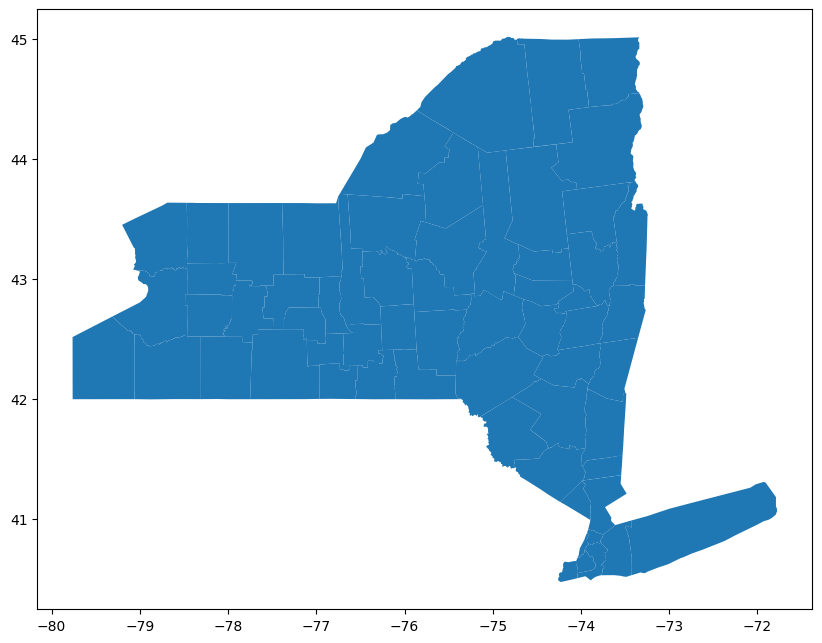

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 1. Read the GeoJSON File
geojson_path = '/content/drive/MyDrive/Data Science Datasets/new-york-counties.geojson'
nys_counties = gpd.read_file(geojson_path)
print(nys_counties.columns)


# Your provided code for processing educational attainment data goes here
latest_file_path = '/content/drive/MyDrive/Data Science Datasets/NYCEducationalAttainment.xlsx'
data_latest = pd.read_excel(latest_file_path, sheet_name='Data', header=None)
county_names = data_latest.iloc[0, 1:]  # Assuming the first cell isn't a county name
divisor_index = 26
dividend_indices = list(range(27, 31))
divisor = pd.to_numeric(data_latest.iloc[divisor_index, 1:].replace(',', '', regex=True), errors='coerce')
dividends = data_latest.iloc[dividend_indices, 1:].apply(lambda x: pd.to_numeric(x.replace(',', '', regex=True), errors='coerce'))
division_results = dividends.div(divisor.values, axis=1)
division_results.columns = county_names
row_names = data_latest.iloc[dividend_indices, 0]
division_results.index = row_names
division_results_cleaned = division_results.dropna(axis=1, how='all')

# Transpose and reset index to make 'County' a column for merging
education_data = division_results_cleaned.transpose().reset_index()
education_data.columns = ['County'] + list(education_data.columns[1:])
#print(division_results_cleaned.columns)
#print(education_data.columns)



# Assuming your GeoJSON 'county name' attribute is 'name', replace 'name' with the correct attribute if different
nys_map = nys_counties.merge(education_data, left_on='name', right_on='County', how='left')

#print(nys_map.head())
#print(nys_map.isnull().sum())


# Replace 'Bachelor’s Degree or Higher' with your specific educational level column name if different
#fig, ax = plt.subplots(1, figsize=(10, 10))
#nys_map.plot(column='Some college or associate\'s degree', ax=ax, legend=True,
#             legend_kwds={'label': "Ratio of Foreign Born with Higher Education by County", 'orientation': "horizontal"})
#plt.show()

fig, ax = plt.subplots(1, figsize=(10, 10))
nys_counties.plot(ax=ax)
plt.show()




In [ ]:
# of foreign born with higher education / # of people living in that county

# Define the file path to the latest uploaded Excel file
latest_file_path = '/content/drive/MyDrive/Data Science Datasets/NYCEducationalAttainment.xlsx'

# Load the data, adjusting for zero-based indexing by pandas (subtracting 1 from provided row indices)
# Skipping rows to directly start from relevant data as indicated in previous attempts
data_latest = pd.read_excel(latest_file_path, sheet_name='Data', header=None)

# Extract county names from row 1 (adjusting for zero-based indexing)
county_names = data_latest.iloc[0, 1:]  # Skipping the first cell assuming it's not a county name

# Adjust indices to 0-based: rows 28-32 in Excel are 27-31 in pandas, and row 27 is 26
divisor_index = 2  # The row to divide by (total foreign born)
dividend_indices = list(range(27, 31))  # Rows for specific educational levels

# Extracting the divisor and dividend rows, converting to numeric and ignoring non-numeric values
divisor = pd.to_numeric(data_latest.iloc[divisor_index, 1:].replace(',', '', regex=True), errors='coerce')
dividends = data_latest.iloc[dividend_indices, 1:].apply(lambda x: pd.to_numeric(x.replace(',', '', regex=True), errors='coerce'))

# Perform the division
division_results = dividends.div(divisor.values, axis=1)

# Assign county names as column headers to the result
division_results.columns = county_names

# Extract and assign row names for the division results
row_names = data_latest.iloc[dividend_indices, 0]  # Extracting row names from the first column
division_results.index = row_names  # Assigning row names to the index of division results

# Drop NaN columns from the division results
division_results_cleaned = division_results.dropna(axis=1, how='all')

division_results_cleaned

,New York,"Albany County, New York","Bronx County, New York","Broome County, New York","Cattaraugus County, New York","Cayuga County, New York","Chautauqua County, New York","Chemung County, New York","Clinton County, New York","Dutchess County, New York",...,"Schenectady County, New York","Steuben County, New York","Suffolk County, New York","Sullivan County, New York","Tompkins County, New York","Ulster County, New York","Warren County, New York","Wayne County, New York","Westchester County, New York","New York city, New York"
0,,,,,,,,,,,,,,,,,,,,,
Less than high school graduate,0.066557,0.020392,0.144870,0.019477,0.004167,0.011285,0.008398,0.012452,0.018098,0.029375,...,0.027024,0.006498,0.054268,0.034104,0.003826,0.020751,0.002879,0.005509,0.070872,0.112313
High school graduate (includes equivalency),0.071247,0.020147,0.135622,0.009704,0.002679,0.002817,0.007752,0.003479,0.010017,0.039800,...,0.052768,0.003733,0.057573,0.054328,0.005893,0.020491,0.005698,0.009021,0.066830,0.119712
Some college or associate's degree,0.052380,0.016687,0.092998,0.013015,0.006790,0.004180,0.009578,0.009817,0.017184,0.028563,...,0.017214,0.004020,0.041097,0.030361,0.016290,0.024880,0.011476,0.012895,0.060558,0.082236
Bachelor's degree,0.054469,0.028173,0.053039,0.015301,0.002307,0.008632,0.005012,0.015810,0.006988,0.026272,...,0.018151,0.006997,0.032841,0.030431,0.039765,0.021566,0.003966,0.004223,0.068643,0.086997


Division results saved to /content/drive/MyDrive/Data Science Datasets/numOfPeopleRatio.csv


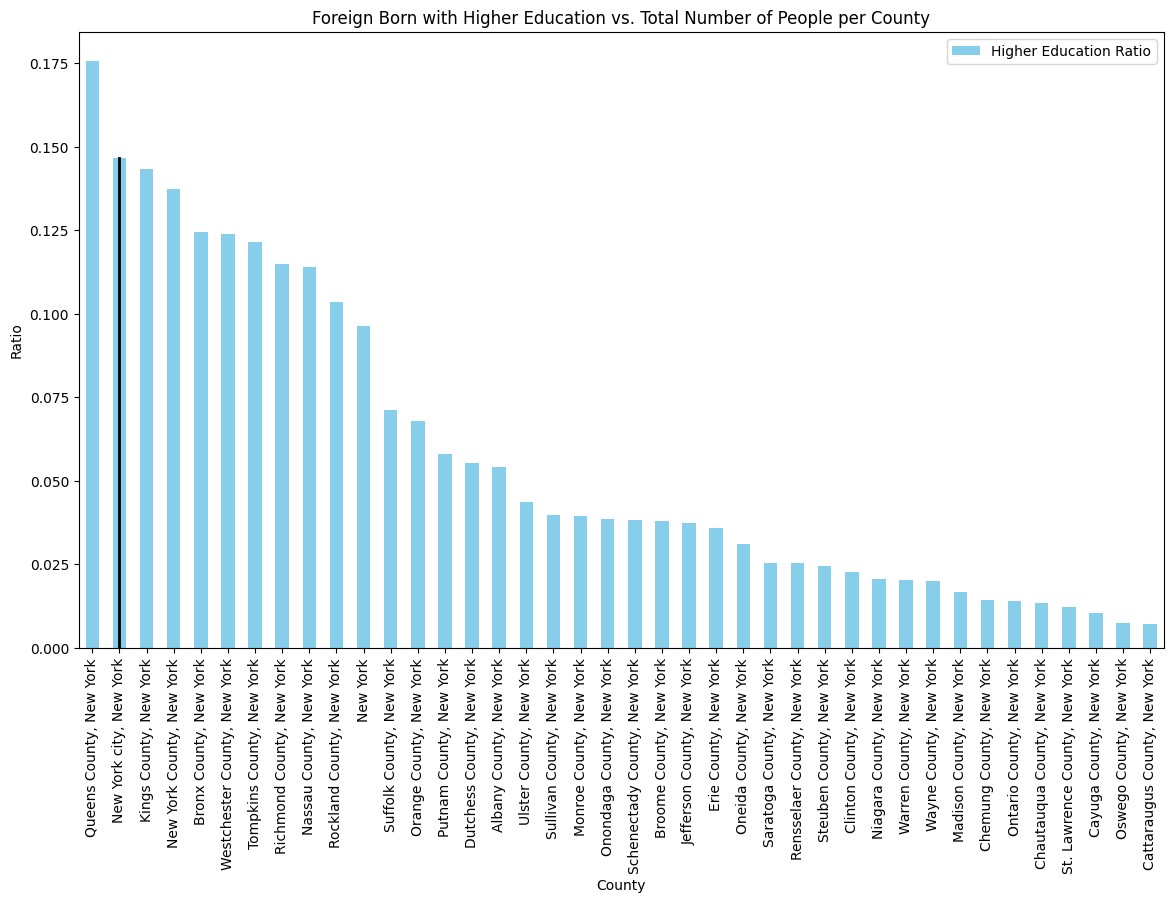

In [ ]:
# of foreign born with higher education / # of people living in the county

file_path = '/content/drive/MyDrive/Data Science Datasets/NYCEducationalAttainment.xlsx'

# Adjust the indices for zero-based indexing and the specific request
divisor_index = 2  # Adjusted index for the total number of foreign born (row 27 in Excel, row 26 in pandas)
dividend_indices = [29, 31]

# Re-load the data from the last uploaded file path
data = pd.read_excel(file_path, sheet_name='Data', header=None)

# Extract county names from the first row, skipping the first cell which is assumed not to be a county name
county_names = data.iloc[0, 1:]

# Convert the divisor and dividend rows to numeric, ignoring non-numeric values
divisor = pd.to_numeric(data.iloc[divisor_index, 1:].replace(',', '', regex=True), errors='coerce')
dividends = data.iloc[dividend_indices, 1:].apply(lambda x: pd.to_numeric(x.replace(',', '', regex=True), errors='coerce'))

# Sum the values in dividend rows to get the total number of foreign-born individuals with higher education
total_higher_education = dividends.sum()

# Calculate the ratio of foreign-born individuals with higher education to the total number of foreign-born individuals
ratio_higher_education = total_higher_education / divisor

# Assign county names as column headers to the ratio series
ratio_higher_education.index = county_names

# Convert the ratio series to a DataFrame for easier visualization
df_ratio_higher_education = pd.DataFrame(ratio_higher_education, columns=['Higher Education Ratio'])

# Clean the DataFrame by dropping NaN values for visualization
df_ratio_higher_education_clean = df_ratio_higher_education.dropna()

# Sort the DataFrame by the 'Higher Education Ratio' column in descending order
df_ratio_higher_education_sorted = df_ratio_higher_education_clean.sort_values(by='Higher Education Ratio', ascending=False)

# New code to save division_results_cleaned to a CSV file
output_file_path = '/content/drive/MyDrive/Data Science Datasets/numOfPeopleRatio.csv'
df_ratio_higher_education_sorted.to_csv(output_file_path, index=True)  # Save DataFrame to CSV, retaining index

print(f'Division results saved to {output_file_path}')  # Confirmation message

# Visualizing the calculated ratios in a bar graph
ax = df_ratio_higher_education_sorted.plot(kind='bar', figsize=(14, 8), legend=True, color='skyblue')
plt.title('Foreign Born with Higher Education vs. Total Number of People per County')
plt.ylabel('Ratio')
plt.xlabel('County')
plt.xticks(rotation=90)

# Get the fourth bar object
fourth_bar = ax.patches[1]

# Calculate the center x position of the fourth bar
x_center = fourth_bar.get_x() + fourth_bar.get_width() / 2

# Calculate the height of the fourth bar
bar_height = fourth_bar.get_height()

# Draw a vertical line through the center of the fourth bar, matching the bar's height
# The y values start at 0 (bottom of the bar) and end at bar_height (top of the bar)
plt.plot([x_center, x_center], [0, bar_height], color='black', linewidth=2)


plt.show()

Division results saved to /content/drive/MyDrive/Data Science Datasets/numWithHEdRatio.csv


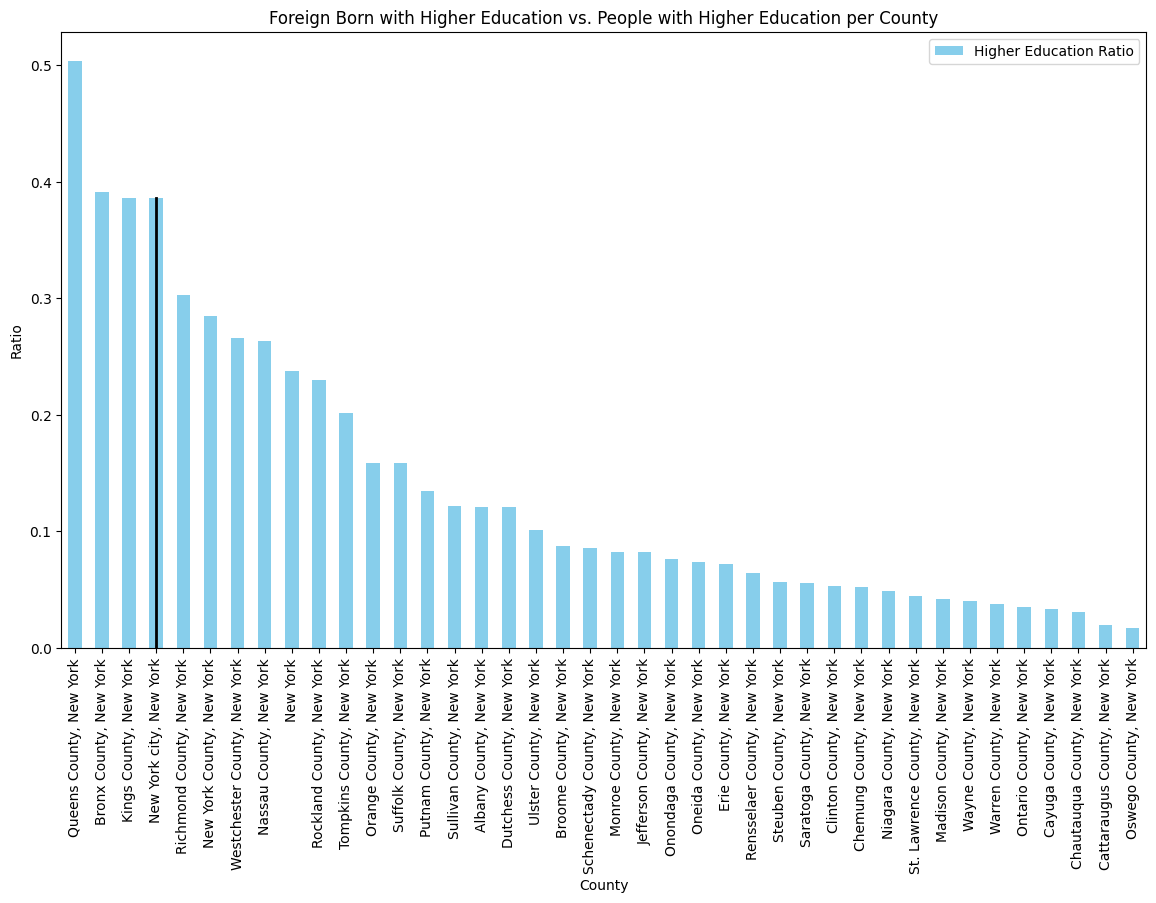

In [ ]:
# # of foreign born with higher education / # of people with higher education for each county

# Adjust the indices for zero-based indexing and the specific request
divisor_indices = [5, 6, 7]  # Corrected indices for rows 6, 7, 8 in Python's zero-based indexing
dividend_indices = [29, 30, 31]  # Corrected indices for rows 30, 31, 32 in Python's zero-based indexing

# Load the data from the last uploaded file path
data = pd.read_excel(file_path, sheet_name='Data', header=None)

# Extract county names from the first row, skipping the first cell which is assumed not to be a county name
county_names = data.iloc[0, 1:]

# Convert the divisor and dividend rows to numeric, ignoring non-numeric values
divisors = data.iloc[divisor_indices, 1:].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce').sum()
dividends = data.iloc[dividend_indices, 1:].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce').sum()

# Calculate the ratio of the sum of rows 30, 31, and 32 to the sum of rows 6, 7, and 8 for each county
ratio_higher_education = dividends / divisors

# Assign county names as column headers to the ratio series
ratio_higher_education.index = county_names

# Convert the ratio series to a DataFrame for easier visualization
df_ratio_higher_education = pd.DataFrame(ratio_higher_education, columns=['Higher Education Ratio'])

# Display the DataFrame to ensure correctness before visualization
df_ratio_higher_education.head()

# Clean the DataFrame by dropping NaN values for visualization
df_ratio_higher_education_clean = df_ratio_higher_education.dropna()

# Sort the DataFrame by the 'Higher Education Ratio' column in descending order
df_ratio_higher_education_sorted = df_ratio_higher_education_clean.sort_values(by='Higher Education Ratio', ascending=False)

# New code to save division_results_cleaned to a CSV file
output_file_path = '/content/drive/MyDrive/Data Science Datasets/numWithHEdRatio.csv'
df_ratio_higher_education_sorted.to_csv(output_file_path, index=True)  # Save DataFrame to CSV, retaining index

print(f'Division results saved to {output_file_path}')  # Confirmation message


# Initialize a list with 'skyblue' for each bar
colors = ['skyblue' for _ in range(len(df_ratio_higher_education_sorted))]

# Set the color of the specific bar (e.g., the one at index 3) to 'red'
colors[3] = 'red'



# Visualizing the cleaned ratios in a bar graph
ax = df_ratio_higher_education_sorted.plot(kind='bar', figsize=(14, 8), legend=True, color='skyblue')
plt.title('Foreign Born with Higher Education vs. People with Higher Education per County')
plt.ylabel('Ratio')
plt.xlabel('County')
plt.xticks(rotation=90)

# Get the fourth bar object
fourth_bar = ax.patches[3]

# Calculate the center x position of the fourth bar
x_center = fourth_bar.get_x() + fourth_bar.get_width() / 2

# Calculate the height of the fourth bar
bar_height = fourth_bar.get_height()

# Draw a vertical line through the center of the fourth bar, matching the bar's height
# The y values start at 0 (bottom of the bar) and end at bar_height (top of the bar)
plt.plot([x_center, x_center], [0, bar_height], color='black', linewidth=2)


plt.show()



In [ ]:
import seaborn as sns

# For demonstration, let's assume your data is structured with rows as counties and one column representing ratios
# If your data is not structured this way, you'll need to reshape it accordingly

# The seaborn library is used to create a heatmap. We'll apply a colormap that ranges from green to red,
# where green represents lower ratios and red represents higher ratios.

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(df_ratio_higher_education_sorted, annot=True, cmap='RdYlGn', linewidths=.5)
plt.title('Heatmap of Higher Education Ratios by County')
plt.ylabel('County')
plt.xlabel('Ratio')
plt.show()


# **JOB POSTING DATA VISUALS**

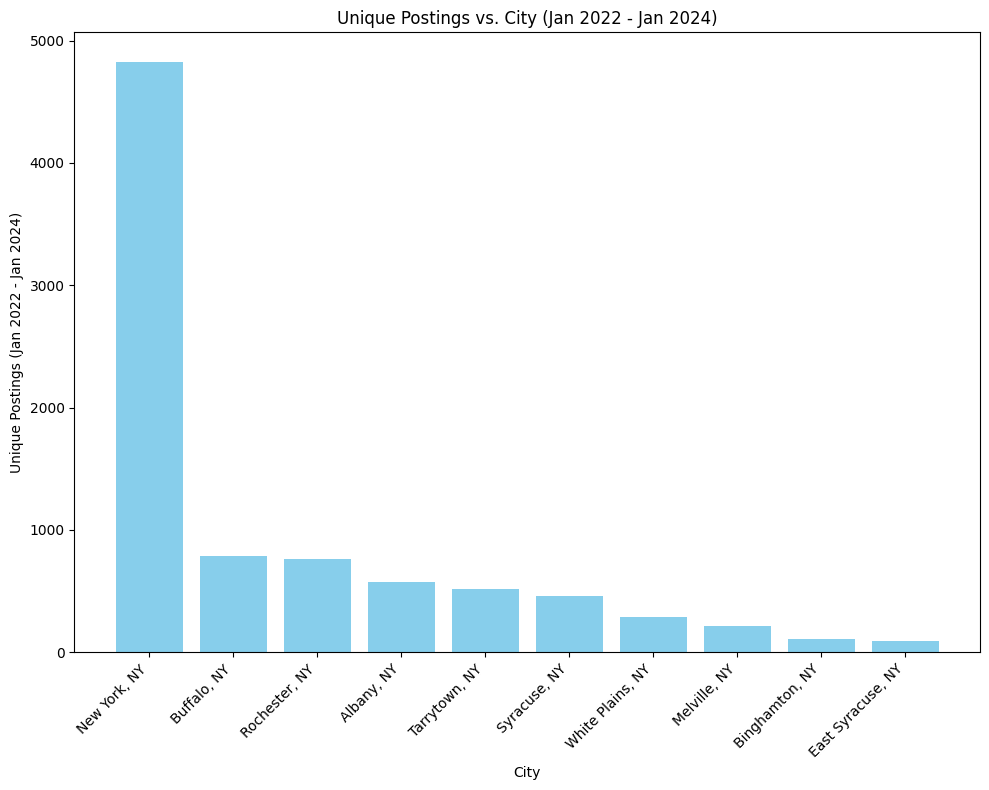

In [ ]:
# Top Cities Postings
file_path = '/content/drive/MyDrive/Data Science Datasets/Job Posting Data/Top Cities Posting.xlsx'
df = pd.read_excel(file_path)

# Sort the dataframe by the 'Total/Unique (Jan 2022 - Jan 2024)' column in descending order
df_sorted = df.sort_values(by='Unique', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.bar(df_sorted['City'], df_sorted['Unique'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Unique Postings (Jan 2022 - Jan 2024)')
plt.title('Unique Postings vs. City (Jan 2022 - Jan 2024)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

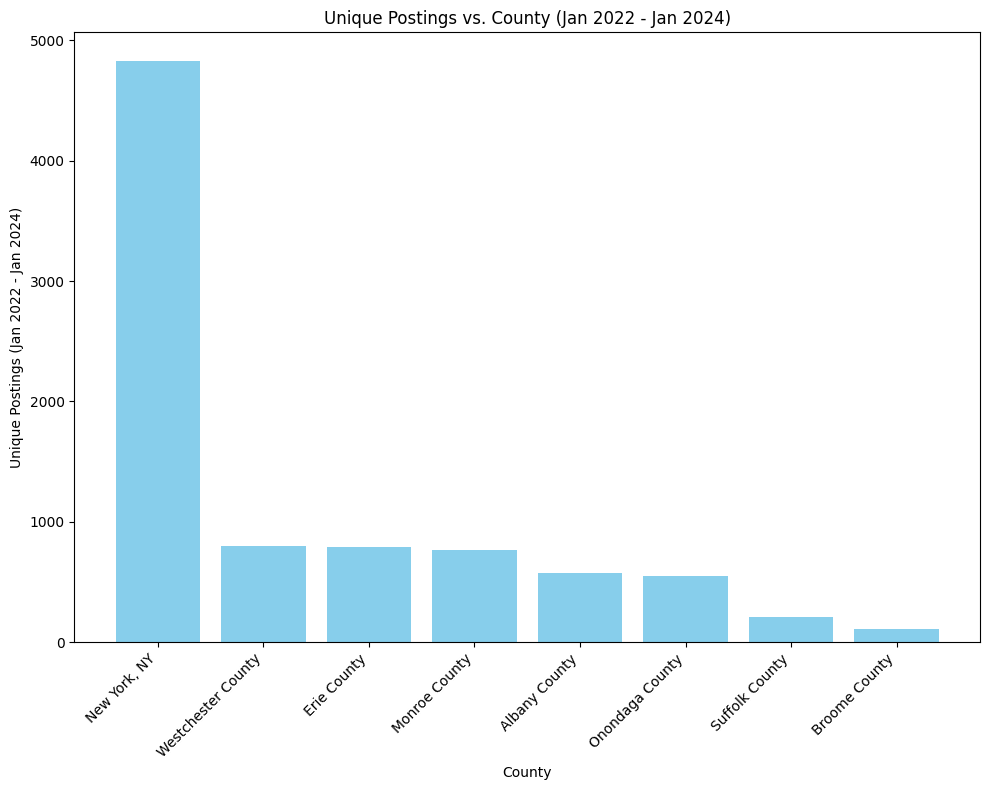

In [ ]:
 # Top County Postings
file_path = '/content/drive/MyDrive/Data Science Datasets/Job Posting Data/Top County Posting.xlsx'
df = pd.read_excel(file_path)

# Sort the dataframe by the 'Total/Unique (Jan 2022 - Jan 2024)' column in descending order
df_sorted = df.sort_values(by='Unique', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.bar(df_sorted['County'], df_sorted['Unique'], color='skyblue')
plt.xlabel('County')
plt.ylabel('Unique Postings (Jan 2022 - Jan 2024)')
plt.title('Unique Postings vs. County (Jan 2022 - Jan 2024)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

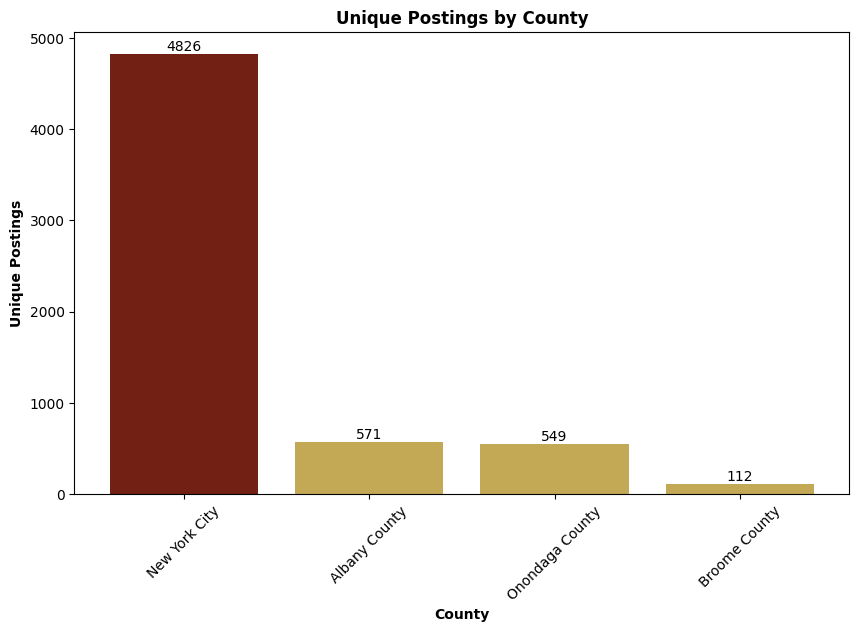

<Figure size 640x480 with 0 Axes>

In [ ]:
# Top County Postings
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the provided data
data = {
    'County': ['New York City', 'Albany County', 'Onondaga County', 'Broome County'],
    'Unique': [4826, 571, 549, 112]
}
df = pd.DataFrame(data)

# Sort the dataframe by the 'Unique' column in descending order
df_sorted = df.sort_values(by='Unique', ascending=False)
colors = ['#721F14' if 'New York City' in label else '#C3A956' for label in sorted_selected_data.index]
# Plotting the results
plt.figure(figsize=(10, 6))
bars = plt.bar(df_sorted['County'], df_sorted['Unique'], color=colors)
plt.xlabel('County', fontweight='bold')
plt.ylabel('Unique Postings', fontweight='bold')
plt.title('Unique Postings by County', fontweight='bold')
plt.xticks(rotation=45)
# Annotate each bar with the value above it
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '%d' % yval, ha='center', va='bottom')
plt.show()

plt.savefig('/content/drive/MyDrive/Data Science Datasets/unique_postings.png')


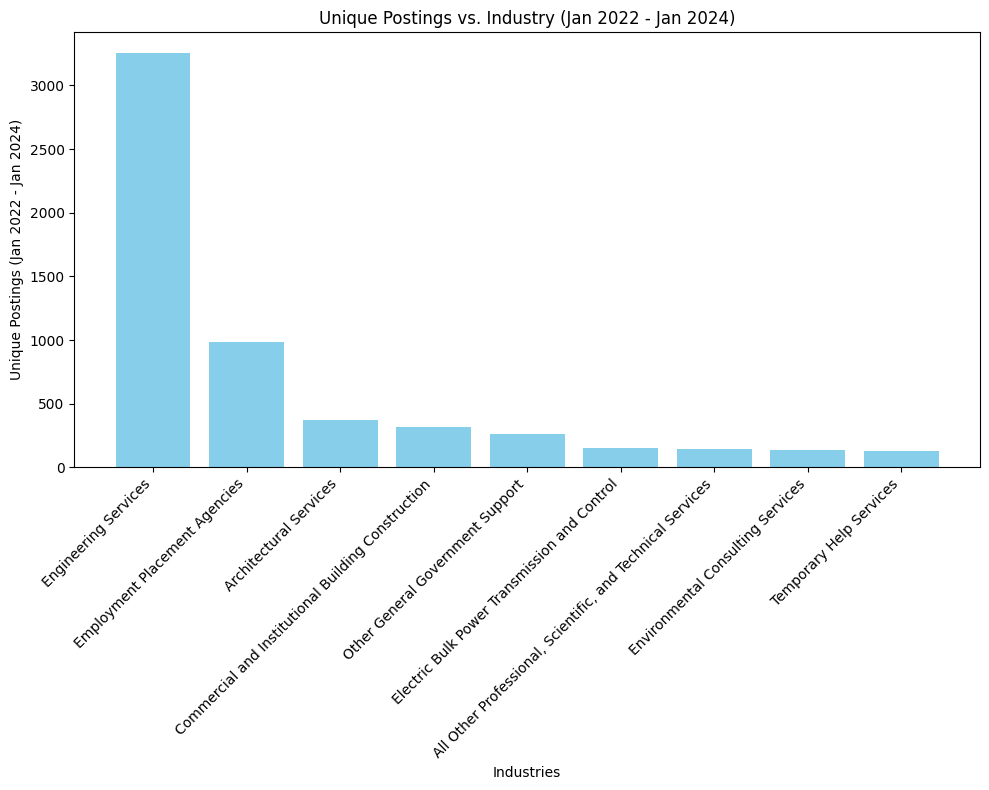

In [ ]:
# Top Industries Postings
file_path = '/content/drive/MyDrive/Data Science Datasets/Job Posting Data/Top Industries.xlsx'
df = pd.read_excel(file_path)

# Sort the dataframe by the 'Total/Unique (Jan 2022 - Jan 2024)' column in descending order
df_sorted = df.sort_values(by='Unique', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.bar(df_sorted['Industries'], df_sorted['Unique'], color='skyblue')
plt.xlabel('Industries')
plt.ylabel('Unique Postings (Jan 2022 - Jan 2024)')
plt.title('Unique Postings vs. Industry (Jan 2022 - Jan 2024)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

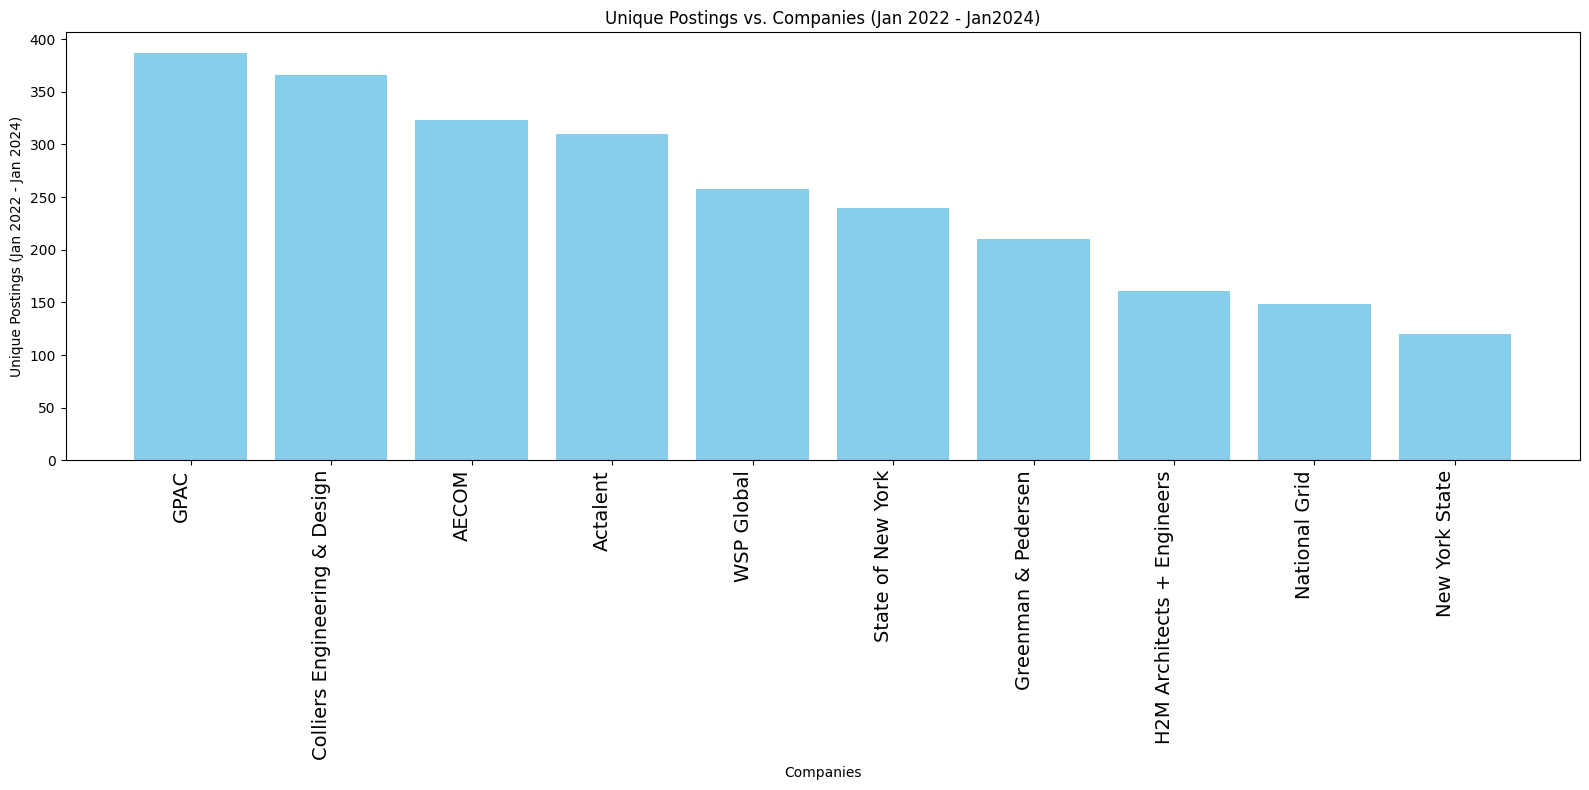

In [ ]:
# Top Posted Companies
file_path = '/content/drive/MyDrive/Data Science Datasets/Job Posting Data/Top Companies Posting.xlsx'
df = pd.read_excel(file_path)

# Sort the dataframe by the 'Total/Unique (Jan 2022 - Jan 2024)' column in descending order
df_sorted = df.sort_values(by='Unique', ascending=False)

# Plotting
plt.figure(figsize=(16, 8))
plt.bar(df_sorted['Companies'], df_sorted['Unique'], color='skyblue')
plt.xlabel('Companies')
plt.ylabel('Unique Postings (Jan 2022 - Jan 2024)')
plt.title('Unique Postings vs. Companies (Jan 2022 - Jan2024)')
plt.xticks(rotation=90, ha="right", size = 14)
plt.tight_layout()
plt.show()


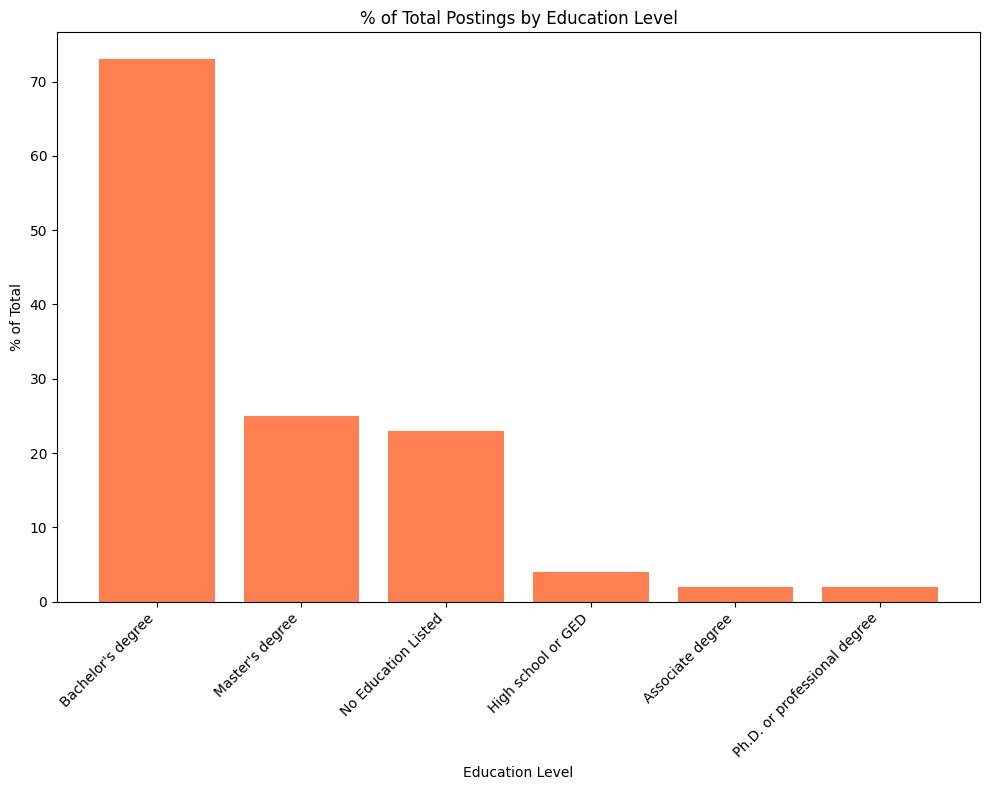

In [ ]:
# Education Level in Job Postings
file_path = '/content/drive/MyDrive/Data Science Datasets/Job Posting Data/Education Breakdown.xlsx'
df = pd.read_excel(file_path)

df_sorted = df.sort_values(by='% of Total', ascending=False)

# Plotting % of Total by Education Level in descending order
plt.figure(figsize=(10, 8))
plt.bar(df_sorted['Education Level'], df_sorted['% of Total'], color='coral')
plt.xlabel('Education Level')
plt.ylabel('% of Total')
plt.title('% of Total Postings by Education Level')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


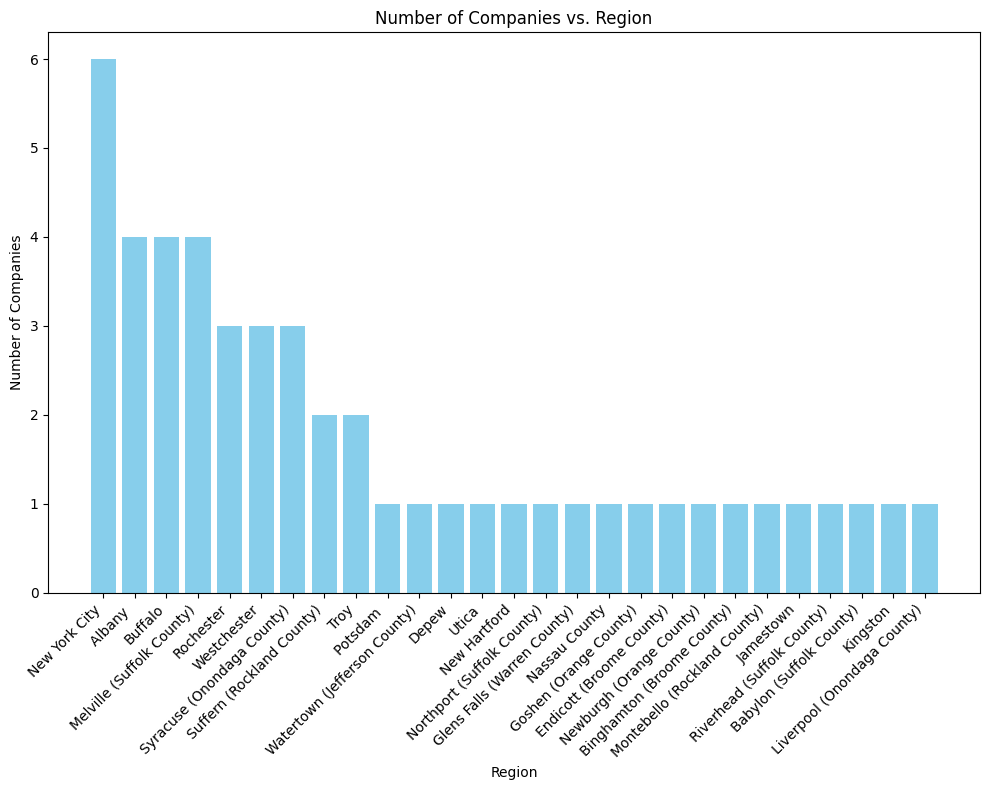

In [ ]:
# Number of Companies with Offices in each Region
file_path = '/content/drive/MyDrive/Data Science Datasets/Job Posting Data/Companies_Region.xlsx'
df = pd.read_excel(file_path)

# Sort the dataframe by the 'Total/Unique (Jan 2022 - Jan 2024)' column in descending order
df_sorted = df.sort_values(by='Number of Companies', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.bar(df_sorted['Region'], df_sorted['Number of Companies'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Companies')
plt.title('Number of Companies vs. Region')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

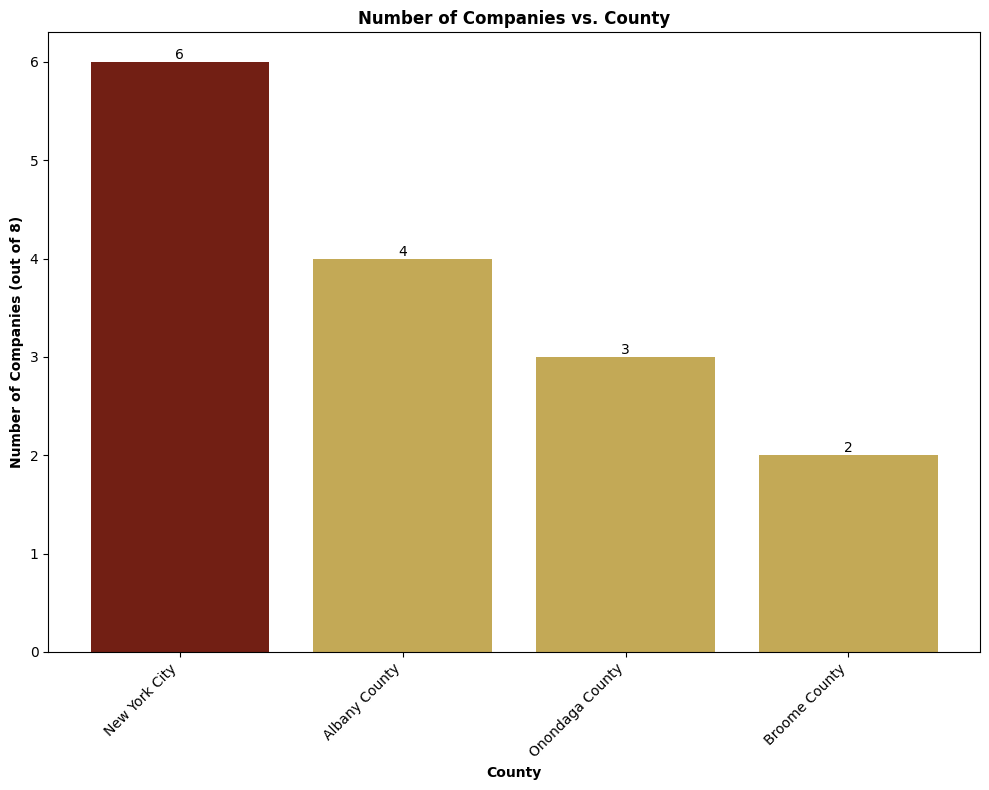

<Figure size 640x480 with 0 Axes>

In [ ]:
# # Number of Companies with Offices in each County
# file_path = '/content/drive/MyDrive/Data Science Datasets/Job Posting Data/Companies_County.xlsx'
# df = pd.read_excel(file_path)

# # Sort the dataframe by the 'Total/Unique (Jan 2022 - Jan 2024)' column in descending order
# df_sorted = df.sort_values(by='Number of Companies', ascending=False)
# df_sorted.head()
# selected_rows = ["New York City", "Albany", "Onondaga", "Broome"]

# selected_data = df_sorted.loc[selected_rows]
# # Sort these values in descending order
# sorted_selected_data = selected_data.sort_values(ascending=False)


# colors = ['#721F14' if 'New York City' in label else '#C3A956' for label in sorted_selected_data.index]

# # Plotting the results
# # Adjust the y-axis label to span two lines for better fit within the plot's height
# plt.figure(figsize=(10, 8))
# plt.bar(sorted_selected_data['County'], sorted_selected_data['Number of Companies'], color='skyblue')
# plt.xlabel('County')
# plt.ylabel('Number of Companies')
# plt.title('Number of Companies vs. County')
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/Data Science Datasets/Job Posting Data/Companies_County.xlsx'
df = pd.read_excel(file_path)

# Assuming 'County' is a column that contains the names. Replace 'County' with the actual column name if different.
if 'County' in df.columns:
    # Set 'County' as the index for easier data manipulation
    df.set_index('County', inplace=True)

# Manually input the number for Albany if it's missing or incorrect
df.at['Albany', 'Number of Companies'] = 4  # Set Albany's number of companies

# Filter the dataframe for specific counties
selected_counties = ["New York City", "Onondaga County", "Albany County", "Broome County"]
selected_data = df.loc[df.index.isin(selected_counties)]

# Sort the dataframe by the 'Number of Companies' column in descending order
sorted_selected_data = selected_data.sort_values(by='Number of Companies', ascending=False)

# Define colors for the bars, considering the order might have changed
colors = ['#721F14' if 'New York City' in label else '#C3A956' for label in sorted_selected_data.index]

# Plotting the results
plt.figure(figsize=(10, 8))
bars=plt.bar(sorted_selected_data.index, sorted_selected_data['Number of Companies'], color=colors)
plt.xlabel('County', fontweight='bold')
plt.ylabel('Number of Companies (out of 8)', fontweight='bold')
plt.title('Number of Companies vs. County', fontweight='bold')
plt.xticks(rotation=45, ha="right")
# Annotate the bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

plt.savefig('/content/drive/MyDrive/Data Science Datasets/companies.png')


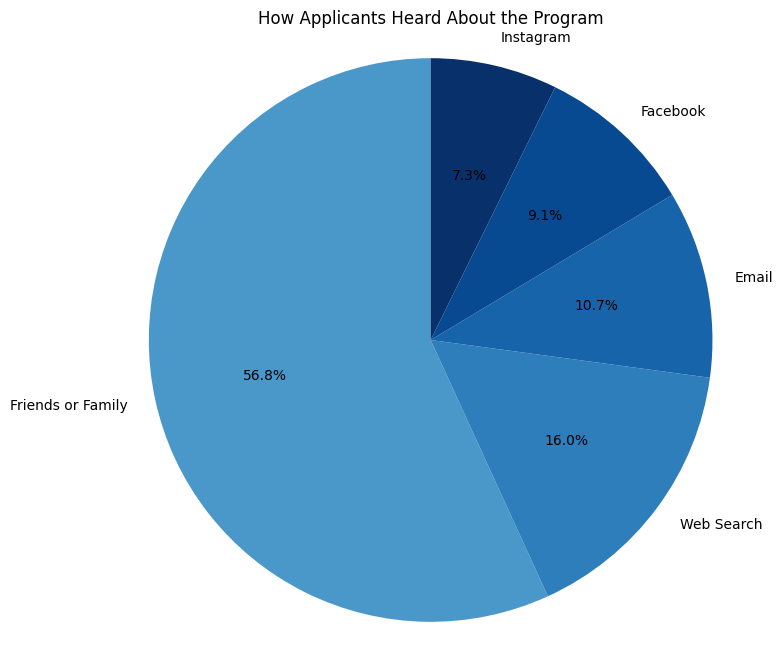

In [ ]:
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Data Science Datasets/RPIE Application Data for Sam Keene.xlsx'

data = pd.read_excel(file_path)

# Data for pie chart
counts = data['Application RPIE - Hear About Program'].value_counts()
labels = counts.index
sizes = counts.values

cmap = plt.get_cmap('Blues')
colors = cmap([0.6, 0.7, 0.8, 0.9, 1.0])  # Generate lighter to darker shades of blue

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('How Applicants Heard About the Program')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()